<a href="https://colab.research.google.com/github/abhishek-hawaldar/datasci_stats/blob/main/LAB2_%20VISUALISE/Bank_LAb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/sample_data/Churn_Data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3096,3097,15745083,Lei,613,Germany,Male,59,8,91415.76,1,0,0,27965.00,1
3962,3963,15600911,Mbadiwe,712,France,Male,33,2,182888.08,1,1,0,3061.00,0
434,435,15799384,Collier,683,France,Male,33,8,0.00,1,0,0,73564.44,0
3142,3143,15586996,Azikiwe,697,France,Female,76,7,0.00,2,0,1,188772.45,0
5496,5497,15642515,Arcuri,620,France,Female,42,1,0.00,2,0,1,65565.92,0
2460,2461,15726403,Glenny,660,Germany,Male,41,1,129901.21,1,1,0,26025.60,1
5109,5110,15576156,Abazu,710,Spain,Female,28,6,0.00,1,1,0,48426.98,0
8683,8684,15599329,Christopher,697,France,Female,49,7,195238.29,4,0,1,131083.56,1
6473,6474,15595557,Li,798,France,Male,22,8,0.00,2,1,0,107615.43,0
5172,5173,15813095,Nwebube,553,France,Male,37,2,0.00,2,1,0,33877.29,0


In [ ]:
data.columns

'''
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 950.8+ KB
'''


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

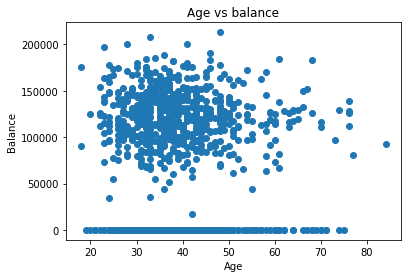

In [ ]:
x=data.sample(1000)
plt.ylabel('Balance')
plt.xlabel('Age')
plt.title('Age vs balance')
plt.scatter(x['Age'], x['Balance'])


<BarContainer object of 1000 artists>

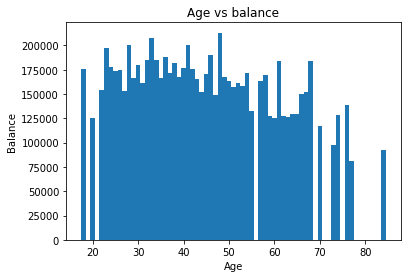

In [ ]:
plt.ylabel('Balance')
plt.xlabel('Age')
plt.title('Age vs balance')
plt.bar(x['Age'],x['Balance'], width=1)

(array([ 13.,  59., 138., 190., 186., 174.,  93.,  54.,  25.,  29.,  16.,
         11.,   6.,   5.,   1.]),
 array([18. , 22.4, 26.8, 31.2, 35.6, 40. , 44.4, 48.8, 53.2, 57.6, 62. ,
        66.4, 70.8, 75.2, 79.6, 84. ]),
 <a list of 15 Patch objects>)

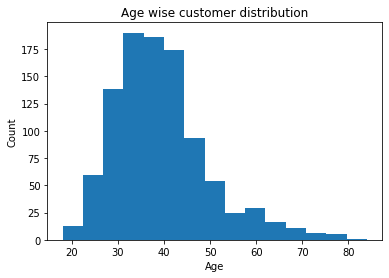

In [ ]:
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Age wise customer distribution')
plt.hist(x['Age'], bins=15)


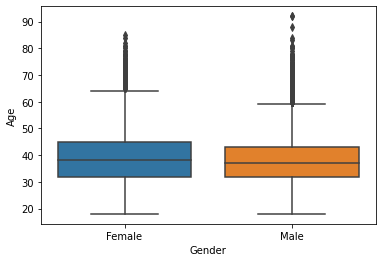

In [ ]:

sns.boxplot(x="Gender", y="Age", data=data)

In [ ]:
sns.heatmap(x.corr(), annot=True, fmt='.2f')

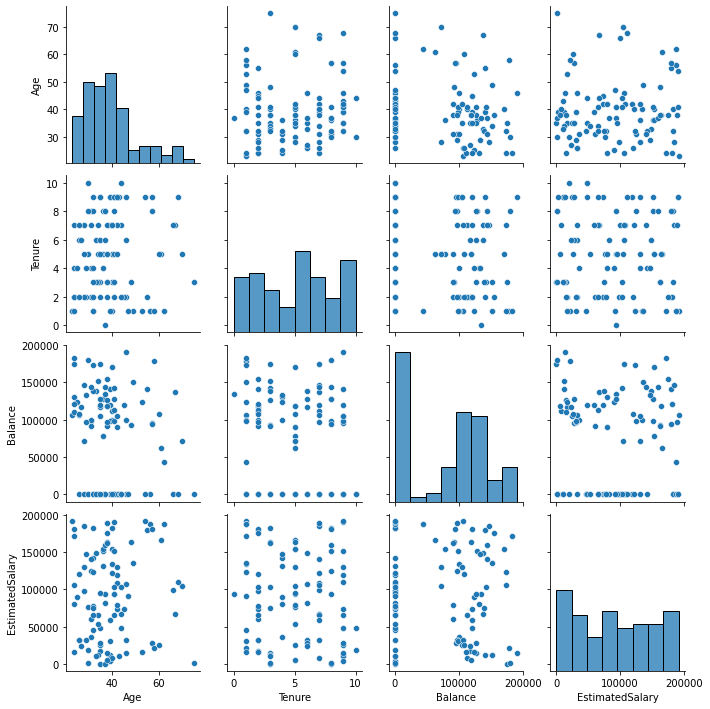

In [ ]:
dfp=x[['Age','Tenure','Balance','EstimatedSalary']]
sns.pairplot(dfp)

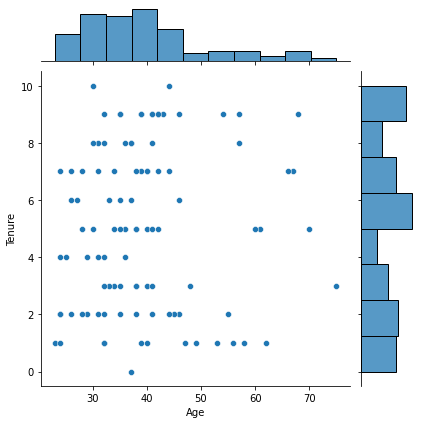

In [ ]:
sns.jointplot(x='Age', y='Tenure', data=x)

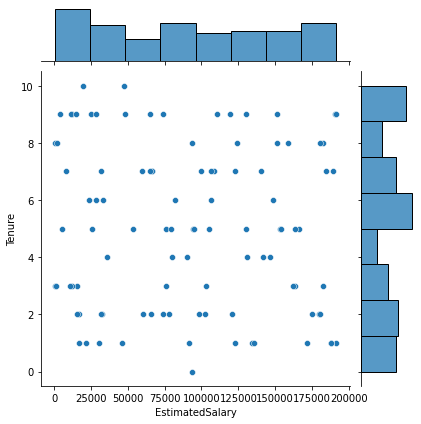

In [ ]:
sns.jointplot(x='EstimatedSalary', y='Tenure', data=x)

In [ ]:
from scipy.stats import iqr
iqr(data['Age'])

12.0

In [ ]:
countries = data.Geography.unique()
print(countries)

['France' 'Spain' 'Germany']


In [ ]:
totalExited = len(data.loc[data.Exited == 1])
print(totalExited)

2037


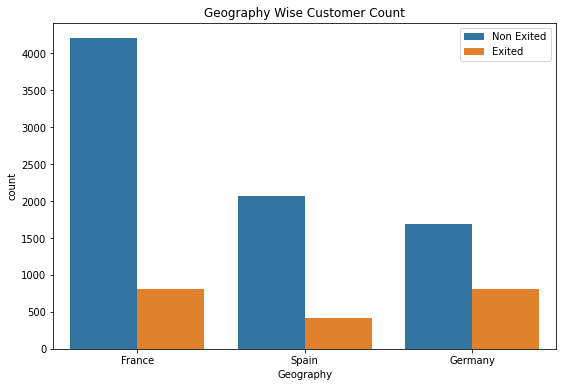

In [ ]:
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=data,
                 x = 'Geography',
                 hue = 'Exited',
                 )
plt.title('Geography Wise Customer Count')
plt.legend(['Non Exited','Exited'])

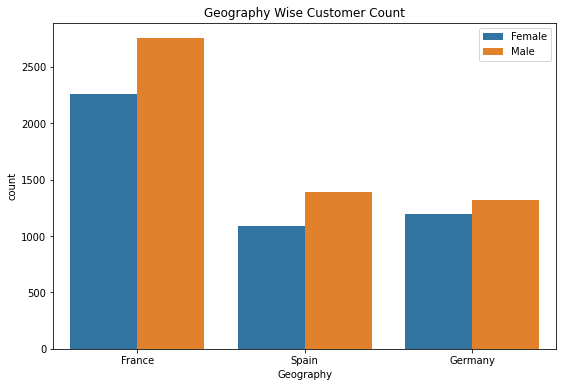

In [ ]:
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=data,
                 x = 'Geography',
                 hue = 'Gender',
                 )
plt.title('Geography Wise Customer Count')
plt.legend(['Female','Male'])

Text(0.5, 1.0, 'Age Wise Balance Distribution')

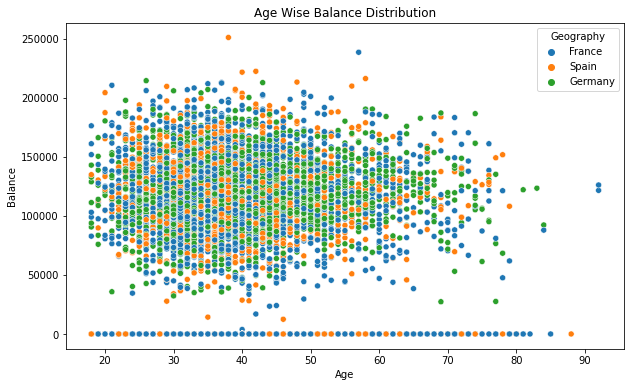

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Balance",hue = 'Geography',data=data,)
plt.title('Age Wise Balance Distribution')

Text(0.5, 1.0, 'Estimated Salary with Age')

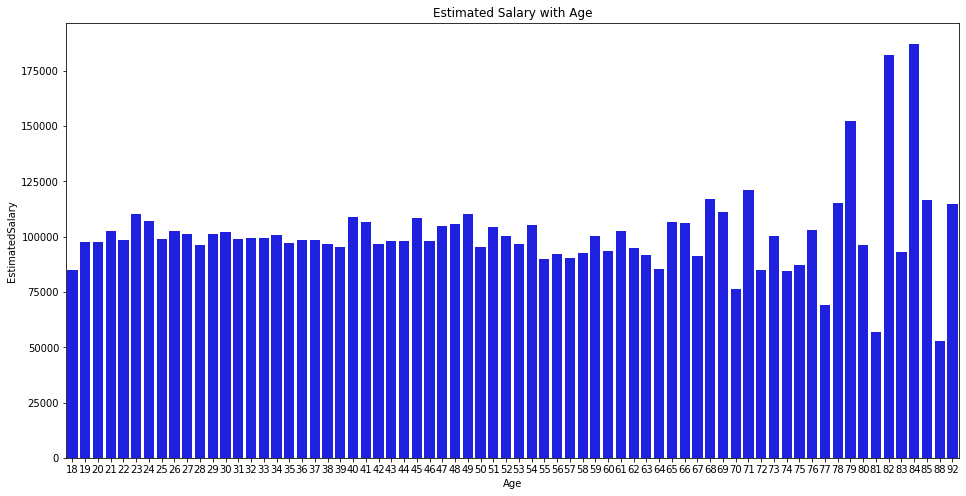

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x= 'Age',y = 'EstimatedSalary',data = data,color='blue',ci=None)
plt.title('Estimated Salary with Age')

Text(0.5, 1.0, 'Estimated Salary with Age')

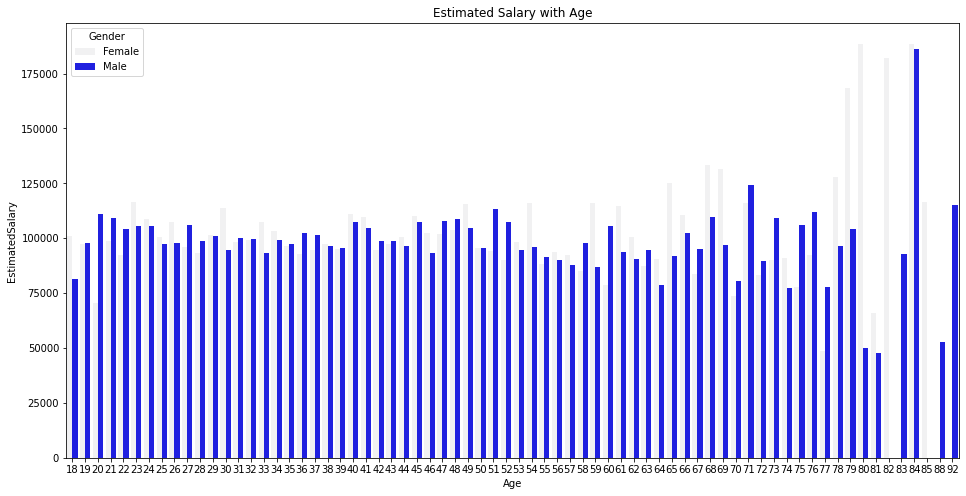

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x= 'Age',y = 'EstimatedSalary',hue='Gender',data = data,color='blue',ci=None)
plt.title('Estimated Salary with Age')

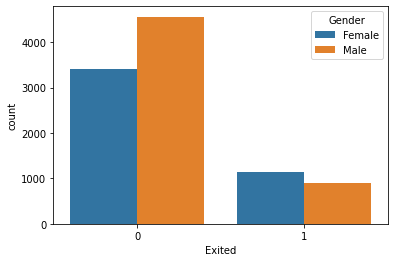

In [ ]:
sns.countplot(x="Exited", hue="Gender", data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


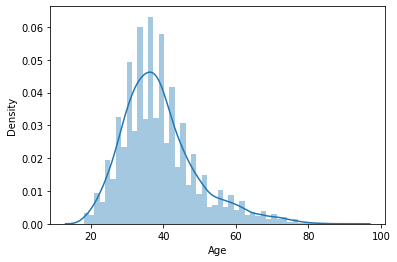

In [ ]:
sns.distplot(data['Age'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c41e0410>,
      dtype=object)

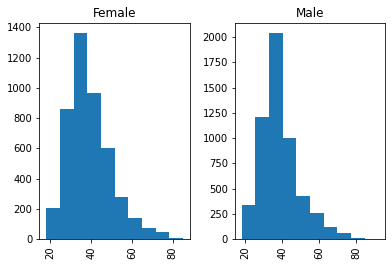

In [ ]:
data.hist(by='Gender',column = 'Age')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c422c8d0>,
      dtype=object)

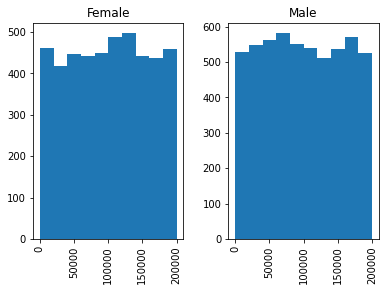

In [ ]:
data.hist(by='Gender',column = 'EstimatedSalary')

In [ ]:
plt.title("Product vs age")
plt.xlabel("Age")
plt.ylabel("no of products")

plt.plot(data['Age'], data['NumOfProducts'])

#plt.grid(axis = data)

plt.show()

In [ ]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8891,8892,15790489,Lo Duca,534,Spain,Male,34,5,170600.78,1,0,1,5240.53,0
300,301,15803976,Efremov,694,France,Female,31,10,0.00,2,1,0,160990.27,0
7309,7310,15793317,Hale,547,Spain,Female,22,7,141287.15,1,1,0,118142.79,0
1872,1873,15706593,Ellis,850,Spain,Female,50,10,0.00,2,1,1,33741.84,0
1185,1186,15795228,Stewart,756,France,Male,37,3,132623.60,1,1,1,58974.00,0
1480,1481,15716822,Moen,646,France,Male,30,5,98014.74,1,1,1,12757.14,0
3841,3842,15750778,Ponomarev,653,France,Female,60,2,120731.39,4,1,1,138160.11,1
1955,1956,15779176,Dike,565,Germany,Female,58,3,108888.24,3,0,1,135875.51,1
9531,9532,15717010,Yu,741,France,Female,60,5,0.00,1,1,1,38914.51,0
5349,5350,15567246,Selwyn,684,Germany,Male,32,3,102630.13,2,1,1,127433.47,0
